# Scientific computation

## Exercise 1: Factorial
Write a function that takes an integer as input and that returns its factorial (n!). Try two ways to implement these functions:

* One with dynamic evaluations using  eval() function.
* One with a recursive function call.

In [36]:
# factorial dynamic evaluation
n=int(input())
res=1
for i in range(1,n+1):
  exp="res * " + str(i)
  #print(exp)
  res=eval(exp)
print(res)

6
720


In [37]:
# factorial recursion
def factorial(n):
	if n == 0 or n == 1:
		return 1
	else:
		return n*factorial(n-1)

print(factorial(5))

120


## Exercise 2: Derivative
In this exercise, we will calculates a derivative. For that purpose, keep in mind the mathematical definition of a derivative is
$$
\frac{df}{dx} = \lim_{\delta x \to 0 } \frac {f(x+\delta x)-f(x)}{\delta x}
$$
1. Write a script that calculate the derivative of f(x)=x2 on 101 points between 0 and 10 for δx=10−2. 
2. Plot the error curve (i.e. expected value – computed value) over the 101 points.
3. Do the same for different values of different values on δx ranging from 10−2 to 10−14. How does the error vary with the δx?

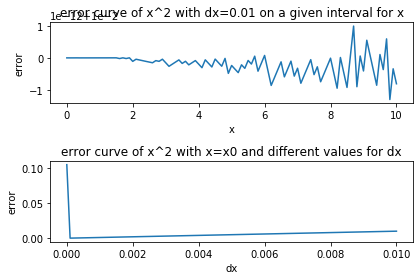

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x*x

def der_f_numerical(x,dx):
  return (f(x+dx)-f(x))/dx

def der_f(x):
  return 2*x


nbPoints=101

xStart=0
xEnd=10
dx=0.01
x=np.linspace(xStart,xEnd,nbPoints)
#print(x)

dxStart=10e-14
dxEnd=0.01
x0=10 # x value to calculate derivative at
deltaX=np.linspace(dxStart,dxEnd,nbPoints)
#print(deltaX)

errorTab=np.empty(nbPoints) # an error array: needed to plot in y axis to see the behaviour as dx decreases
computed=np.empty(nbPoints) # an array of numerically computed approximate derivative values for x
expected=np.empty(nbPoints) # an array of actual derivative values for x
for i in range(len(deltaX)):
  errorTab[i]=np.abs(der_f(x0)-der_f_numerical(x0,deltaX[i]))
  computed[i]=der_f_numerical(x[i],dx)
  expected[i]=der_f(x[i])
error=np.abs(expected-computed)

nbPlots=2
fig,axs=plt.subplots(nrows=nbPlots,ncols=1)
axs[0].plot(x,error)
axs[0].set_xlabel('x')
axs[0].set_ylabel('error')
axs[0].set_title("error curve of x^2 with dx=0.01 on a given interval for x")
axs[1].plot(deltaX,errorTab)
axs[1].set_xlabel('dx')
axs[1].set_ylabel('error')
axs[1].set_title("error curve of x^2 with x=x0 and different values for dx")
plt.tight_layout()

## Exercise 3: Evaluation of pi
In this exercise we will write a script to estimate $\pi$ by computing the area of the unitary circle. Two approaches will be compared.

*Integration with trapezoid method* 

Split the [−1;1] range into n stripes (see figure below). Then, calculate the area occupied by the circle in each stripe and by considering it as a trapezoid. Finally, add them together in order to obtain the area of the circle.
Do the same for different values of n, such as 10, 100, 1000 ... What is the impact of n on the accuracy of the estimation of $\pi$? \\
*Integration with a stochastic method*

Write a script that draws randomly npoints in a square of size 2 centered on (0,0). Then, use the equation of the unitary circle, i.e. $x^2+y^2=1$ to count the number of point inside the circle. Finally, use this value to estimate the area of the circle.
Do the same for different values of n, such as 10, 100, 1000 ... What is the impact of n on the accuracy of the estimation of $\pi$? \\
*Method comparison* 

Estimate the computation time for both methods. What is the most efficient method regarding the accuracy and the computation time?
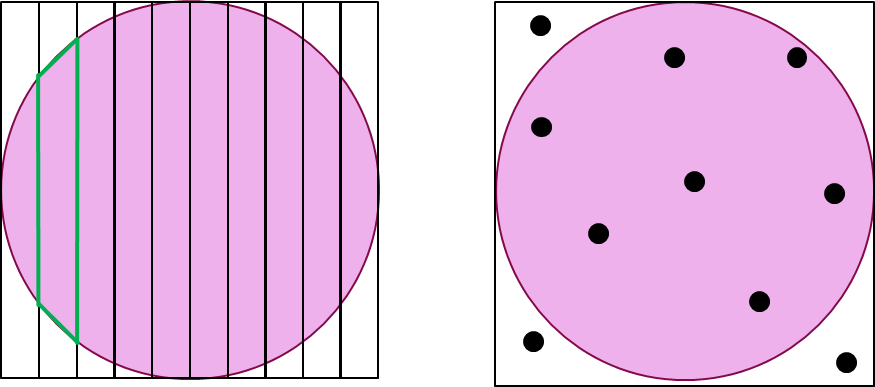

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.  240.
  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.  360.
  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.  480.
  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.  600.
  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.  720.
  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.  840.
  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.  960.
  970.  980.  990. 1000.]
[3.03704883 3.10451833 3.12139141 3.12846488 3.13219631 3.13444316
 3.13591827 3.13694773 3.13769964 3.13826851 3.13871118 3.13906363
 3.13934967 3.13958558 3.13978285 3.1399498  3.14009257 3.1402158
 3.14032303 3.14041703 3.14049998 3.14057361 3.14063933 3.14069828
 3.1407514  3.14079945 3.1408431  3.14088289 3.14091928 3.14095266
 3.14098337 3.14101171 3.14103791 3.1410622  3.14108477 

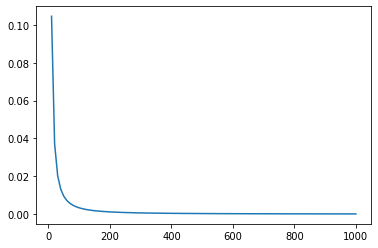

In [41]:
# Integration with a trapezoid method
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

actual_PI=3.1415926535897932384626433
# a and b stands for the boundaries of range
a=-1
b=1
n=100 # number of strips
h=(b-a)/n # height for each trapezoid

R=(b-a)/2 # radius of circle
area_traps=0 # area of trapezoids

'''
for t in range(int(n/2)):
  side1=2*sqrt( (R**2-(a+t*h)**2) )
  side2=2*sqrt( (R**2-(a+(t+1)*h)**2) )
  mean=(side1+side2)/2
  #print(mean,side1,side2)
  area_traps += mean*h
  print(area_traps)
area_circle = area_traps*2
'''

#nValues=list(range(10,1000,10))
nValues=np.empty(100)
PIs=np.empty(100)
count=10
for i in range(len(nValues)):
  nValues[i]=count
  count+=10

error=np.empty(100)
print(nValues)
for i in range(len(nValues)):
  area_traps=0
  h=(b-a)/nValues[i]
  for t in range(int(nValues[i]/2)):
    side1=2*sqrt( (R**2-(a+t*h)**2) )
    side2=2*sqrt( (R**2-(a+(t+1)*h)**2) )
    mean=(side1+side2)/2
    #print(mean,side1,side2)
    area_traps += mean*h
    #print(area_traps)
    area_circle = area_traps*2
    PIs[i]=area_circle/(R**2)
    error[i]=np.abs(PIs[i]-actual_PI)
#area_circle = area_traps*2
#PI = area_circle/(R**2)
for i in range(len(nValues)):
  nValues[i]=(nValues[i])
plt.plot(nValues,error)
print(PIs)
#print(PI)

In [53]:
# Integration with a stochastic method
from random import random
import numpy as np

nbPoints=100000
nInside=0

R=1 # radius of a circle
for i in range(nbPoints):
  x=random()
  y=random()
  if x**2+y**2 <= R*R:
      nInside+=1
PI=4*(nInside/nbPoints)
print(PI)

3.1468


## Exercise 4: Electrical circuit
Consider the following electrical circuits. All the resistors are equivalent. 

1. Find the equations that link $V_A, V_B, V_C$ and $V_D$. Millmann's theorem might helps you. 
2. Write a program that solve these equation to compute the value of these four voltages. What will be the value of point A, B, C and D ?
3. Which other Python packages could you have used to solve this problem?

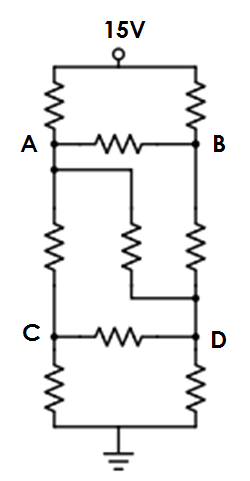

In [54]:
import numpy as np

# Solving following system of linear equation
# Va=(V0+Vb+Vc+Vd)/4
# Vb=(V0+Va+Vd)/3
# Vc=(Va+Vd)/3
# Vd=(Va+Vb+Vc)/4

A=np.array([[1,-1/4,-1/4,-1/4],[1/3,-1,0,1/3],[1/3,0,-1,1/3],[-1/4,-1/4,-1/4,1]])
B=np.array([15/4,-5,0,0])

print(np.linalg.solve(A,B))

[ 9. 10.  5.  6.]


## Exercise 5: Lorentz equations
Lorenz equations are a set of three coupled differential that may exhibit chaotic behavior. This model correspond to a simplification of a model used to predict meteorological phenomenon. The three coupled equations are:

$$ \frac{dx}{dt}=σ⋅(y−x) $$

$$ \frac{dy}{dt}=ρ⋅x−y−x⋅z $$

$$ \frac{dz}{dt}=x⋅y−β⋅z $$
where x, y and z are the variables and σ , ρ and β are model parameters.

1. Write a program that solves Lorenz equations for σ=10, ρ=28 and β=3. Use the time range [0;50] with at least 1000 points.
2. Plot x, y and z as a function of time for different initial conditions. **Which are the requirements on initial conditions to obtain chaotic behavior?**
3. Plot x versus y phase diagram when the behavior is chaotic. **Which shape do you obtain?**
4. Play with the σ, ρ and beta. **Which are the requirements on the parameters to obtain chaotic behavior?**

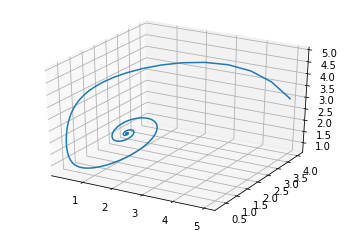

In [55]:
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(vars,t):
  x=vars[0]
  y=vars[1]
  z=vars[2]

  sigma=10
  dxdt=sigma*(y-x)
  rho=3
  dydt=rho*x-y-x*z
  beta=1
  dzdt=x*y-beta*z
  derivs=[dxdt, dydt, dzdt]
  return derivs

t=np.linspace(0,50,1000)
c0=np.array([5,4,3])

vars=scint.odeint(func,c0,t)
x=vars[:,0]
y=vars[:,1]
z=vars[:,2]


#plt.plot(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)

## Exercise 6: Biochemical reaction
In this exercise,  we simulate  an enzymatic reaction involving four chemical species: an enzyme E, a substrate S, a product P and a complex formed by the enzyme and the substrate ES. Two reactions are involved in the process:

* The binding between the E and S, which gives ES. This reaction is reversible. The forward reaction constant is k1 and the reverse reaction constant is k−1.
* The degradation of ES into E and P. This reaction is not reversible. The forward reaction constant is k2.

All reactions are modeled by first-order kinetics law. Two simulation approaches will be compared, namely the deterministic approach and the stochastic approach.

**Deterministic approach**

1. Establish the set of 4 differential equations that describe the behavior of the concentration of E, S, P and ES.
2. Compute the response of the chemical system over 60 seconds with k1=0.01, k−1=0.001, k2=5 and an initial quantity of enzyme E0=10 and substrate S0=1000. Initial concentration of ES and P is 0.
3. Plot E, S ES and P as a function of the time. Estimate the response time of the system, i.e. the time for S to reach 95% of its final value.

**Stochastic approach**


1. Watch this video to understand Gillespie's algorithm:  https://www.youtube.com/watch?v=46ruoTTLL5g
2. Simulate the response of the system according to Gillespie's algorithm.
3. Plot E, S ES and P as a function of the time. **What do you observe?**
4. Reduce E0 to 5 and S0 to 50 and perform the simulation again. **What do you observe now?**
5. Perform 100 runs with this condition, compute the average behavior and compare to the results of the deterministic approach with the new values for E0 and S0. You might need for interp from numpy to calculate the average behavior. **What could you point out?**

48.768768768768766


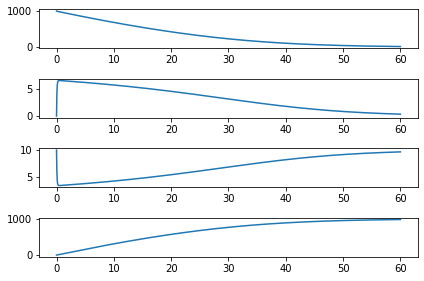

In [56]:
# Ex6: Biochemical reaction (deterministic approach)
'''
d[S]/dt=-k1[E][S]+k(-1)[ES]
d[ES]/dt=k1[E][S]-(k2+k(-1))[ES]
d[E]/dt=-k1[E][S]+(k2+k(-1))[ES]
d[P]/dt=k2[ES]
'''
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt

def func(vars, t):
  S=vars[0]
  ES=vars[1]
  E=vars[2]
  P=vars[3]
  k1=0.01
  k0=0.001
  k2=5
  dSdt=-k1*E*S+k0*ES
  dESdt=k1*E*S-(k2+k0)*ES
  dEdt=-k1*E*S+(k2+k0)*ES
  dPdt=k2*ES
  
  derivs=[dSdt, dESdt, dEdt, dPdt]
  return derivs

t=np.linspace(0,60,1000)
c0=np.array([1000,0,10,0])

sol=scint.odeint(func,c0,t)
S=sol[:,0]
ES=sol[:,1]
E=sol[:,2]
P=sol[:,3]

# for determination of response time
for i in range(1000):
  if S[i] < 51 and S[i] > 49:
    print(t[i])
    break

fig, axs = plt.subplots(4)
axs[0].plot(t,S)
axs[1].plot(t,ES)
axs[2].plot(t,E)
axs[3].plot(t,P)
fig.tight_layout()

# Data Processing

## Exercice 1: Statistical analysis
The goal of this exercise is to use scipy.stats module to analyze data distribution.

**Part 1 - Tests on fictive data set**
1. Generate three arrays of 1000 values randomly drawn according to following distribution:
  * For X, a normal distribution centered on 1 and with a standard deviation of 2. 
  * For Y, an uniform distribution between -1 and 1.
  * For Z, an exponential distribution with a mean value of 5.
2. Calculate the mean value and the standard deviation for all of these arrays. **Are they in accordance with your expectations?**
3. The Shapiro-Wilk test is a standard normality test. It estimates if a data set could have resulted from a random draw according to a normal distribution. Apply the Shapiro-Wilk test on X, Y and Z and observe the p-value. **What can you conclude?**
4. Display the histogram of X, Y and Z.


**Part 2 - Tests on actual data set** \\
For each of these four use cases, load the associated data file (text format), apply Shapiro-Wilk and calculate the mean value and the standard deviation to identify the type of distribution associated with the data.

1. The same chemical reaction is done in 60 differents test tube and we measure, for each of them, the pH at the end of the reaction. Data are collected in this [file](https://drive.google.com/open?id=103wttYfIpICcXvnWFt4Od_4EVoGNxPph). **Assess the distribution of pH over the 60 tubes.**

2. We monitor the emission of cosmic particle with a Wilson cloud chamber during 3 hours. This [file](https://drive.google.com/open?id=1jRKkjiE0e2nJX7o54M31XYpplCe1Mk5G) contains a list of timestamp in second that correspond to each impact of a particle in the chamber. **Assess the distribution of the time between two events.**

3. We monitor the average daily wind velocity place over one year. Data are given in this [file](https://drive.google.com/open?id=1-RLch3Gaa6lS1O-xCd0X1QJWjBlXRD2O). **Assess the distributrion of average daily wind.**

4. We launch a spinning top 100 times and measure the angle at which its rotation stops. Data are given in this [file](https://drive.google.com/open?id=1VWW3wQ4JJ6rSiyVZQ9Y-BMAOsZyY51eL). **Assess the distribution of the final angle.**

0.9492487184497359
2.0179480896480113
-0.013884489456583105
0.5827614962903341
4.7486055235365985
4.608687139899799
(0.9987260699272156, 0.7060520648956299)
(0.9537380933761597, 3.3024514285522237e-17)
(0.8169370293617249, 3.1280377811857277e-32)


(array([528., 278., 111.,  42.,  20.,  12.,   7.,   1.,   0.,   1.]),
 array([6.19442599e-04, 3.76696410e+00, 7.53330876e+00, 1.12996534e+01,
        1.50659981e+01, 1.88323427e+01, 2.25986874e+01, 2.63650320e+01,
        3.01313767e+01, 3.38977214e+01, 3.76640660e+01]),
 <a list of 10 Patch objects>)

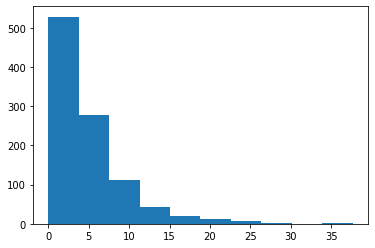

In [57]:
# Part 1
import scipy.stats as sc
import matplotlib.pyplot as plt

# Question 1
#X = sc.norm.ppf(np.random.random(1000), loc=mean, scale=std)
X=sc.norm.rvs(loc=1, scale=2, size=1000) # normal dist with mean=1 and std=2
Y=sc.uniform.rvs(loc=-1,scale=2,size=1000) # uniform dist between -1 and -1+2
Z=sc.expon.rvs(scale=5,size=1000) # exponential dist with mean=5
# Question 2
print(X.mean())
print(X.std())
print(Y.mean())
print(Y.std())
print(Z.mean())
print(Z.std())
# Question 3
print(sc.shapiro(X))
print(sc.shapiro(Y))
print(sc.shapiro(Z))
# Question 4
#plt.hist(X)
#plt.hist(Y)
plt.hist(Z)

**Q2:** The values of mean and standard deviation for our 3 datas (X, Y and Z arrays) calculated using scipy methods are very close to their expected values
**Q3:** In Shapiro-Wilk test one can get an array where two values are presented: W (statistics) and p (p-value). We focus on p-value that helps us to determine whether our sample data follows normal distribution or not or in other words Shapiro-Wilk is a normality test. If our p-value is bigger than our threshold *alpha* whose value is considered to be 0.05, then most probably our sample is a Gaussian one.

[3.0, 56.0, 71.0, 77.0, 86.0, 97.0, 265.0, 322.0, 322.0, 324.0, 338.0, 396.0, 464.0, 536.0, 553.0, 581.0, 642.0, 646.0, 653.0, 658.0, 681.0, 761.0, 842.0, 894.0, 929.0, 936.0, 954.0, 996.0, 1026.0, 1048.0, 1106.0, 1107.0, 1120.0, 1125.0, 1130.0, 1145.0, 1162.0, 1271.0, 1320.0, 1341.0, 1353.0, 1418.0, 1587.0, 1610.0, 1692.0, 1703.0, 1737.0, 1748.0, 1761.0, 1773.0, 1775.0, 1792.0, 1820.0, 1855.0, 1860.0, 1932.0, 1933.0, 2004.0, 2070.0, 2077.0, 2133.0, 2142.0, 2150.0, 2167.0, 2189.0, 2213.0, 2266.0, 2304.0, 2312.0, 2320.0, 2323.0, 2327.0, 2493.0, 2528.0, 2542.0, 2583.0, 2585.0, 2586.0, 2591.0, 2665.0, 2672.0, 2735.0, 2743.0, 2801.0, 2821.0, 2851.0, 2952.0, 3014.0, 3033.0, 3091.0, 3095.0, 3172.0, 3179.0, 3211.0, 3232.0, 3245.0, 3288.0, 3300.0, 3306.0, 3372.0, 3460.0, 3476.0, 3491.0, 3666.0, 3762.0, 3906.0, 3954.0, 4023.0, 4072.0, 4084.0, 4086.0, 4213.0, 4218.0, 4225.0, 4231.0, 4313.0, 4490.0, 4536.0, 4543.0, 4576.0, 4592.0, 4627.0, 4657.0, 4699.0, 4730.0, 4769.0, 4950.0, 4977.0, 4986.0, 50

(array([30., 33., 32., 21., 22., 21., 22., 16., 27., 21.]),
 array([3.0000e+00, 1.0825e+03, 2.1620e+03, 3.2415e+03, 4.3210e+03,
        5.4005e+03, 6.4800e+03, 7.5595e+03, 8.6390e+03, 9.7185e+03,
        1.0798e+04]),
 <a list of 10 Patch objects>)

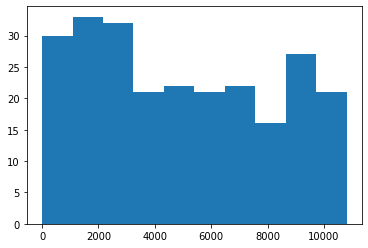

In [58]:
# Part 2
import io
import matplotlib.pyplot as plt
import statistics as st
from google.colab import files

#uploaded = files.upload() # was important to load files while working with Colab
#filename='pH.data'
filename='time.data'
#filename='wind.data'
#filename='angle.data'
#file = io.BytesIO(uploaded[filename]) # to read files
file=open("/content/data_files/time.data", 'r')

data=[]
for line in file.readlines():
  data.append(float(line))
print(data)
print(st.mean(data))
print(st.stdev(data))
print(sc.shapiro(data))
plt.hist(data)

It appears that:
* pH data is a normal distribution
* time data is not normally distributed, but uniform
* average daily wind data is normally distributed
* final angle data is not following normal distribution, but uniform

## Exercise 2: Parse chemical formula with regular expression
The goal of this exercice is to parse a chemical formula and return a dictionnary with atoms as keys and number of each atoms in the molecule as value. For instance, when applied on water (H20) the function should return {'H':2, '0':1}. The function have to suppost compact formula as well as extended ones (e.g. CH3OH)

To simplify the purpose, we consider three rules

* If the atom symbol is composed of one letters, it is uppercase. If the atom symbol is composed of two letters, the first is uppercase and the second lowercase
* Ions are excluded from the processing.
* Formula with paranthesis, e.g. Ca(OH)2 are expluded from the processing.
1. Write the function
2. Test the function on ethanol, glucose, caffeine, adenosine triphosphase (ATP) and sodium chlorate.
3. The [Formula.csv](https://drive.google.com/open?id=1LzEmEqUF2bt7J6HxZfRM52k2Arq5Z011) is composed of 266 rows (one per molecule) and 2 columns (molecule name and formula). **Read this file and display the name of molecules that have exactly 4 hydrogens.**
4. **What is the only molecule that has 3 bromine atoms.**

In [59]:
import re

def parse_chemical(formula):
  x = re.split("[0-9]", formula)
  z={}
  y=re.split("([A-Z][a-z]*)(\d*)", formula)
  for i in range(1,len(y)-2,3):
    if y[i] not in z:
      z.update({y[i]:0})
      if y[i+1] != '':
        z[y[i]] += int(y[i+1])
      else:
        z[y[i]] += 1
    else:
      if y[i+1] != '':
        z[y[i]] += int(y[i+1])
      else:
        z[y[i]] += 1
  return z
  
parse_chemical('NaClO3')

{'Cl': 1, 'Na': 1, 'O': 3}

In [60]:
import csv

#uploaded = files.upload() # was important to load files while working with Colab
#file = io.BytesIO(uploaded['Formula.csv']) # to read files
#file = open('/content/data_files/Formula.csv', 'r')

count4H=0
with open('/content/data_files/Formula.csv', 'r') as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
      dic=parse_chemical(row[1])
      if 'H' in dic and dic['H'] == 4:
        print(row[0])
        count4H += 1
      if 'Br' in dic and dic['Br'] == 3:
        print("The only molecule in our csv file with exactly 3 bromine atoms: ", row[0])
    print(count4H, "molecules with 4 hydrogen atoms")

Acetic acid
Methane
Ammonium nitrate
Ammonium chloride
Methanol
Hydrazine
Ammonium nitrate
Maleic acid
Ammonium bromide
Para dichlorobenzene
Ammonium iodide
Ammonium nitrate
Ammonium nitrite
Urea
The only molecule in our csv file with exactly 3 bromine atoms:  Aluminum bromide
Acetaldehyde
Ethylene
16 molecules with 4 hydrogen atoms


## Exercise 3: Data analysis with Pandas
In this exercise, we will learn how to manipulate data with the Pandas module.

1. Import data from the [AminoAcids.csv](https://drive.google.com/open?id=1VVtcKD8EeyzP6rNKoSEcamX7Jz64U6GE) file. The first raw and first column of the CSV file should be the horizontal and vertical headers of data frames. Display the first five molecules of the file.

2. Display all the informations about the lysine.

3. Then, use Pandas methods to:

  a. Display the heaviest molecule \\
  b. Display all the posivively charges molecules \\
  c. Count the number of molecule of each polarization type \\
  d. Display the heaviest molecule of each polarization type \\
  e. Compute the average value and the standard deviation of the molecule for each polarization type \\

4. Use the function that parses the chemical formula developped in Exercice 4 to count the number of C, H, N and O of each amino acids. Add four new columns to the data set, i.e. the number of C, H, N and O.

5. Display the molecule with the most H

6. Save the completed data set in a new file NewAminoAcids.csv


In [63]:
import pandas as pd
import io
from google.colab import files

#uploaded = files.upload() # was important to load files while working with Colab
#acids = io.BytesIO(uploaded['AminoAcids.csv']) # to read files

acids = pd.read_csv('/content/data_files/AminoAcids.csv')
#print(acids)
print(acids.head(5)) # Q1
print(acids.loc[acids['Name'] == 'Lysine']) # Q2
# Q3
print(acids[acids['Molecular Weigth'] == acids['Molecular Weigth'].max()]) # a)
print(acids.loc[acids["Polarization"] == 'positive']) # b)

allTypes=acids.Polarization.unique() # to get all possible and unique values for a certain column attribute
for iType in allTypes:
  print(iType, (len(acids.loc[acids['Polarization'] == iType]))) # c)
  molecules=acids[acids['Polarization'] == iType] # creating a list of molecules of one polarization type 
  print(molecules[molecules['Molecular Weigth'] == molecules['Molecular Weigth'].max()]) # d)
  # e)
  print("Average Value")
  print(molecules.mean())
  print("Standard Deviation")
  print(molecules.std())
  print()
# Q4
acids['C'] = [0 for x in range(len(acids))]
acids['H'] = [0 for x in range(len(acids))]
acids['N'] = [0 for x in range(len(acids))]
acids['O'] = [0 for x in range(len(acids))]

#for index, row in acids.iterrows():
for i in range(len(acids)):
  dic=parse_chemical(acids.at[i,'Molecular Formula']) # Q4
  #print(dic)
  acids.at[i,'C']=dic['C']
  acids.at[i,'H']=dic['H']
  acids.at[i,'N']=dic['N']
  acids.at[i,'O']=dic['O']

print(acids[acids['H'] == acids['H'].max()]) # Q5
#acids.to_csv(r'~/CS/L3/CSfPh/files/NewAminoAcids.csv') # Q6: didn't work here bcz of colab

            Name Three letter code One letter code  ...    pKx     pl Polarization
0        Alanine               Ala               A  ...    NaN   6.00    non-polar
1       Arginine               Arg               R  ...  12.48  10.76     positive
2     Asparagine               Asn               N  ...    NaN   5.41        polar
3  Aspartic acid               Asp               D  ...   3.65   2.77     negative
4       Cysteine               Cys               C  ...   8.18   5.07        polar

[5 rows x 12 columns]
      Name Three letter code One letter code  ...    pKx    pl Polarization
11  Lysine               Lys               K  ...  10.53  9.74     positive

[1 rows x 12 columns]
          Name Three letter code One letter code  ...  pKx    pl Polarization
17  Tryptophan               Trp               W  ...  NaN  5.89     aromatic

[1 rows x 12 columns]
         Name Three letter code One letter code  ...    pKx     pl Polarization
1    Arginine               Arg              

## Exercice 4: Web research
In this exercice, we will use the webbook of chemistry of the NIST to find the chemical formula and the molecular weigth of a molecule. The webpage associated to a givel molecule MOLECULE is https://webbook.nist.gov/cgi/cbook.cgi?Name=MOLECULE. Formula and molecular weigth can be found in the code source of the HTML file:

* The molecular weigth is the ?????? in the following line:  Molecular weight</a>:</strong> ??????</li>
* The formula is the ?????? in the following line: Formula</a>:</strong> ??????</li>. The formula may content <sub> and </sub> HTML tags that have to be suppressed. \\
  1. Look for the NIST webpage of your favorite chemical molecule. Use the requests module to get the source code in Python. Look at the HTML code that gives the molecular weigth and the one that gives the formula
  2. Write a function that request the webpage of a molecule which name is given as argument and that return the chemical formula and the molecular weigth
  3. Test your function on glucose, ethanol, caffeine, octane and cyclohexane


In [64]:
import requests
import re

def get_info(molecule):
  txt='https://webbook.nist.gov/cgi/cbook.cgi?Name='
  toFind = "Molecular weight</a>:</strong> .*</li>"
  link=txt+molecule
  x=requests.get(link)
  #print(x.text)
  p = re.compile(toFind)
  
  match=(p.search(x.text).group()) #entire string that matched
  #print(match)
  res=re.findall("\d*\.?\d+", match) # extracting only numbers, i.e. weight
  #print(float(res[0]))
  return float(res[0])

print(get_info('caffeine'))

194.1906


##Exercise 5: Basics on machine learning
The purpose of this exercise is to give a short introduction to machine learning. The *sklearn* module will be used for that purpose. Several learning algorithm exists. In this short introduction, decision trees will be used. 

Here is the situation. A soldier on top of a 10-meter-high hill tries to shot a village at 2 km from him. The length of the village is 1 km. After each shoot, he can adjust the initial speed of his cannonball $v_0$ in the range 100-200 m/s and the angle $\alpha$ the cannon forms with the ground in the range 30°-60°. The following sketch summatize the situation.
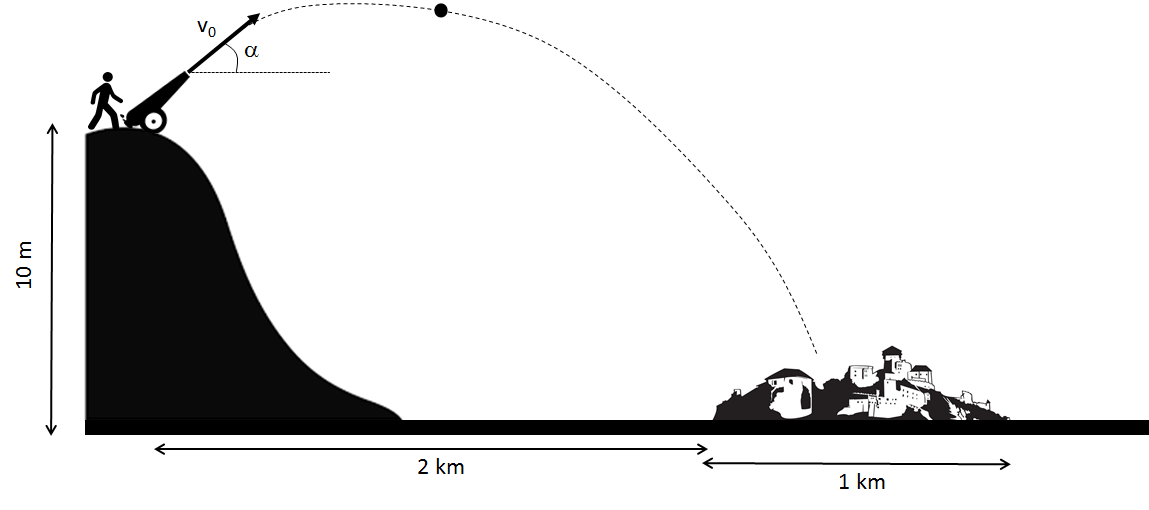

1. Write the ballistic function taking $v_0$ and $\alpha$ as input and returning a Boolean which is True if cannonball hits the village.
2. Generate the learning dataset, composed of 100 random combinations of $v_0$ and $\alpha$. For each of them, use the previous function in order to check if the village gets hit or not.
3. Use *DecisionTreeClassifier()*, *fit()* and *plot_tree()* of the *tree* submodule to create, train and display the classifier based on decision trees. 
4. Generate the verification dataset, composed of 100 other random combinations of $v_0$ and $\alpha$. For each of them, compare the value predicted by the classifier and the one calculated by the ballistic function. **Present the results as a confusion matrix:**
$$CM=\begin{bmatrix}N_{1,1} & N_{1,0}\\N_{0,1} & N_{0,0}\end{bmatrix}$$

  where N_{1,1} is the number of true positives: prediction and theory agreed that the cannonball hits the village.
  N_{0,0} is the number of true negatives: prediction and theory agreed that the cannonball does not hit the village.
  N_{0,1} is the number of false positives: a hit is predicted but the cannonball actually does not hit the village. 
  N_{1,0} is the number of false negatives: no hit is predicted but the cannonball actually hits the village.

5. Another way to estimate the accuracy of the predictor is to find N combination of $v_0$ and $\alpha$ for which the village is actually hit and count the number of good predictions. The same operation can also be done with N combination for which the village is not hit. **Use these metrics to assess the impact of *italics* parameters (3, 5, 10, 15) of the *DecisionTreeClassifier()* function with N=10000.**
6. We now consider a case in which the learning process has been done in poor weather conditions. The file [spoiledLearningData.csv](https://drive.google.com/open?id=1Hb7ER_YCAwgfqz-KYrD9Ph6VH3HPQj6t) contains these spoiled unperfect learning data. Train the classifier Perform steps 2 to 5 again with this data. **Assess the impact of these bad learning data.**

In [65]:
import numpy as np
import random
from sklearn import tree

# Q1
def ballistic(v0,alpha):
  g=9.81
  L=v0**2*np.sin(2*alpha/180*np.pi)/g/1000 # to convert the unit from m to km 
  #L=v0*np.cos(alpha/180*np.pi)*np.sqrt(2*10/g)/1000 # to convert the unit from m to km
  #print(L)
  if L>=2 and L<=3:
    return True
  else:
    return False

# Q2
N=100
v0_random=np.random.uniform(low=100, high=200, size=(N))
alpha_random=np.random.uniform(low=30, high=60, size=(N))
random_data=np.column_stack((v0_random,alpha_random))
hit=[None]*N
for i in range(N):
  hit[i]=(ballistic(v0_random[i], alpha_random[i]))
# Q3
nLeafNodes=None
clf = tree.DecisionTreeClassifier(max_leaf_nodes=nLeafNodes) #cl - classification
clf = clf.fit(random_data,hit) # fit method trains the decision tree on our data set
#tree.plot_tree(clf)
# Q4
v0_random=np.random.uniform(low=100, high=200, size=(N))
alpha_random=np.random.uniform(low=30, high=60, size=(N))
verification_data=np.column_stack((v0_random,alpha_random))

CM = np.array([[0,0],[0,0]])
for i in range(N):
  prediction = clf.predict([[verification_data[i][0],verification_data[i][1]]])
  #print(prediction)
  if prediction == True and ballistic(verification_data[i][0],verification_data[i][1]) == True:
    CM[0][0] += 1
  elif prediction == True and ballistic(verification_data[i][0],verification_data[i][1]) == False:
    CM[1][0] += 1
  elif prediction == False and ballistic(verification_data[i][0],verification_data[i][1]) == True:
    CM[0][1] += 1
  else:
    CM[1][1] += 1
print(CM)
# Q5
print("New metrics:")
print("", CM[0][0]/(CM[0][0]+CM[1][0])*100)
print(CM[1][1]/(CM[0][1]+CM[1][1])*100)

[[31  3]
 [ 0 66]]
New metrics:
 100.0
95.65217391304348


**Remark:** While using new metrics to assess the impact of max_leaf_node, I tried different values (3, 5, 10, 15) for it as a parameter of the DecisionTreeClassifier() function with N=10000. The more the value, the better accuracy we get. By default, it is noted as None which means it can be unlimited. In that case the best accuracy is observed.

In [66]:
# Q6
import io
from google.colab import files
import csv
from numpy import genfromtxt

#uploaded = files.upload() # was important to load files while working with Colab
#data = io.BytesIO(uploaded['spoiledLearningValue.csv']) # to read files
with open('/content/data_files/spoiledLearningValue.csv', 'r') as file:
  data = genfromtxt('/content/data_files/spoiledLearningValue.csv', delimiter=';')    
#print(data)
spoiled_data=data[:,:2]
spoiled_hit=data[:,2]
#print(spoiled_data)
#print(spoiled_hit)

nLeafNodes=10
clf = tree.DecisionTreeClassifier(max_leaf_nodes=nLeafNodes) #cl - classification
clf = clf.fit(spoiled_data,spoiled_hit) # fit method trains the decision tree on our data set
#tree.plot_tree(clf)

v0_random=np.random.uniform(low=100, high=200, size=(N))
alpha_random=np.random.uniform(low=30, high=60, size=(N))
verification_data=np.column_stack((v0_random,alpha_random))

CM = np.array([[0,0],[0,0]])
for i in range(N):
  prediction = clf.predict([[verification_data[i][0],verification_data[i][1]]])
  #print(prediction)
  if prediction == True and ballistic(verification_data[i][0],verification_data[i][1]) == True:
    CM[0][0] += 1
  elif prediction == True and ballistic(verification_data[i][0],verification_data[i][1]) == False:
    CM[1][0] += 1
  elif prediction == False and ballistic(verification_data[i][0],verification_data[i][1]) == True:
    CM[0][1] += 1
  else:
    CM[1][1] += 1

print(CM)
print("New metrics:")
print("", CM[0][0]/(CM[0][0]+CM[1][0])*100)
print(CM[1][1]/(CM[0][1]+CM[1][1])*100)

[[19 13]
 [ 3 65]]
New metrics:
 86.36363636363636
83.33333333333334


## Exercise 6: Processing AFM measurement
Atomic Force Microscopy is a technique used to measure the heigth and the elasticity of very small objects (typ. submicronic resolution). The principle is illustrated on the following figure. \\

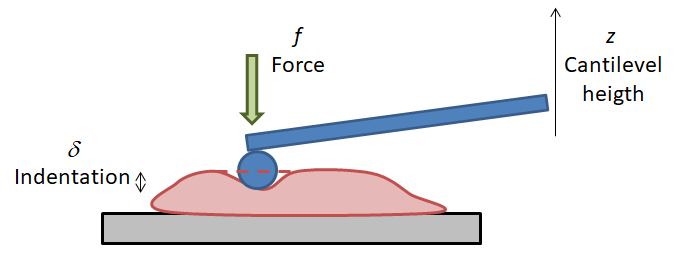



The probe is a spherical tip suspended at the end of a cantilever. The cantilever moves down until it touches the surface of the sample. The height of the cantilever at the contact point, often called $ZCP$, is one of the characteristics of the sample. After contact, the tip sinks into the sample to a depth called indentation (or $\delta$). Due to the resistance of the material, the indentation requires the application of a force $f$ which is estimated from the deflection of the cantilever. The relationship between $f$ and $\delta$ is given by :

$$f=\frac{4}{3} \cdot E \cdot \sqrt{R_C} \cdot \delta^{\frac{3}{2}}$$

where $R_C$ is the radius of the tip and $E$ is the Young's modulus (elasticity), another parameter of interest for the sample.
On the z-axis, we can also calculate the $\delta$ as a function of $z$ as following:

$$\delta=ZCP+\frac{f}{k}−z$$

where $k$ is the spring constant of the cantilever. The AFM instrument provides for each sample a binary file composed of a header and data. Header are the 24 first Bytes of the file. It is composed of 6 values encoded as floats (4 Bytes) and corresponds to the system parameters:

* the gain to apply on height data to obtain the actual heigth
* the offset to apply on height data to obtain the actual heigth
* the gain to apply on force data to obtain the actual heigth
* the offset to apply on force data to obtain the actual heigth
* the spring constant of the cantilever
* the radius of the tip.

After the header, measurement are given as a couple of unsigned integers encoded in 8 Bytes (4 Bytes each). The first element corresponds to the force, the second to the heigth.

1. Test the *curve_fit* function of the *scipy.optimize* module. For that purpose, create a **$\delta$** vector containing values from 0 to 1µm in a 1-nm steps. Then, calculate the associated $f$ with above equation (choose a value for the Young's modulus). Multiply each $f$ value by randomly drawn factor out of a Gaussian distribution centered on 1 and a standard deviation of 0.1 to simulate the reading error. Finally, use *curve_fit*, to retrieve the value of *E* you have choosen.
2. Open the file [AFMBinData.dat](https://drive.google.com/open?id=1t6wZHE_2jyXZdpXEX88TyH0Afa_ohoFA) and extract the header (6 parameters) and the raw data. Calculate the actual *f* and *z* values by adjusting the raw data by gains and offsets read from in the header. 
3. The ZCP is initially set at 6 µm. Calculate the Young's modulus value under these conditions using only the part of the curve that is below the contact point. Tip: In principle, the measured force should be zero before the point of contact. However, this is not the case because of gravity. To process this data, you are advised to remove the gravity offset as it is not taken into account in the above equation.
4. The position of the contact point is very difficult to estimate visually. One method currently used is to try several contact points and fit the $\delta−f$ curve with a power law. The final value of the contact point is the one for which the exponent of the power law is closest to its theoretical value, i.e. 1.5

In [68]:
import scipy.stats as sc
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def f(sigma,E):
  Rc=0.001
  return 4/3*E*Rc**.5*sigma**1.5

E=0.01
sigma=np.arange(0,10E-6,10E-9)
f_values=np.zeros(len(sigma))
f_noise=np.zeros(len(sigma))
X=sc.norm.rvs(loc=1, scale=0.1, size=len(f_noise)) # normal dist with mean=1 and std=2
for i in range(len(f_values)):
  f_values[i] = f(sigma[i],E)
for i in range(len(f_noise)):
  f_noise[i] = f_values[i]*X[i]

popt, pcov = curve_fit(f, sigma, f_noise)
print(popt)

[0.0099837]


In [69]:
#uploaded = files.upload() # was important to load files while working with Colab
filename='/content/data_files/AFMBinData.dat'
#file = io.BytesIO(uploaded[filename]) # to read files

f=open(filename,"rb")
#num=list(f.read())
#print (num)
data = np.fromfile(f, '<f4')  # little-endian float32
print(data[0:6])
f.close()

[-1.1266830e-14  1.7042379e-06  6.9173541e-18  0.0000000e+00
  3.0558103e-01  3.0000001e-07]


## Exercise 7: Parsing balance equation with regular expression
The goal of this exercise is to read a file containing 1000 chemical balance equations, parse them and exclude the ones that are not well balanced. The rules for the writing of balance equations are the following:

* The equation is composed of two terms. The left term (reactants) is separated from the right term (products) by ->
* Inside each term, molecules are separated with +
* There is no whitespace in the balanced equation
* The molecular formula is preceded by the stoichiometric coefficient without any whitespace or symbol (e.g. 2H20 means two molecules of H20).
* Inside molecular formula, if the atom symbol is composed of one letter, it is uppercase. If the atom symbol is composed of two letters, the first is uppercase and the second lowercase
* Ions are excluded from the processing.
* Formula with parenthesis, e.g. Ca(OH)2 are excluded from the processing.

Read the [balanceEquations.txt](https://drive.google.com/open?id=1I2BhcwMV2GlCUyD51-eFyVoGFusj4jII) file and count the number of well-balanced equations

In [0]:
import re

def parse_chemical(formula):
  x = re.split("[0-9]", formula)
  z={}
  y=re.split("([A-Z][a-z]*)(\d*)", formula)
  for i in range(1,len(y)-2,3):
    if y[i] not in z:
      z.update({y[i]:0})
      if y[i+1] != '':
        z[y[i]] += int(y[i+1])
      else:
        z[y[i]] += 1
    else:
      if y[i+1] != '':
        z[y[i]] += int(y[i+1])
      else:
        z[y[i]] += 1
  return z

In [71]:
import io
import matplotlib.pyplot as plt
import statistics as st
from google.colab import files
from collections import Counter

file=open('/content/data_files/balanceEquations.txt', 'r')
#uploaded = files.upload() # was important to load files while working with Colab
#filename='balanceEquations.txt'
#file = io.BytesIO(uploaded[filename]) # to read files
data=[]
for line in file.readlines():
  data.append(line)

#print(data[0][0])
#data[0].pop(0)
for i in range(len(data)):
  print(data[i])
  sides=(str(data[i]).split('->'))
  left=sides[0].split('+')
  right=sides[1].split('+')
  #print(left)
  #print(right)
  dict_left=Counter({})
  dict_right=Counter({})
  for iChemicals in range(len(left)):
    dict_left += Counter(parse_chemical(left[iChemicals]))
  for iChemicals in range(len(right)):
    dict_right += Counter(parse_chemical(right[iChemicals]))
  print(dict_left)

  # WONT WORK LIKE THIS

  #print(parse_chemical(left[1]))
  #print(parse_chemical(right[0]))
  #print(parse_chemical(right[1]))
  #m=re.search(r"\d", right[1])
  #if m is not None:
   # print(m.start())
  #print(re.findall(r'\d+', right[1]))
  #print(data[0])
  #print(right[0])

C3H8+4O2->3CO2+3H2O

Counter({'H': 8, 'C': 3, 'O': 2})
H3PO4+2KOH->K3PO4+H2O

Counter({'O': 5, 'H': 4, 'P': 1, 'K': 1})
C2H6+4O2->2CO2+4H2O

Counter({'H': 6, 'C': 2, 'O': 2})
2Na+2O2->NaO2

Counter({'O': 2, 'Na': 1})
H3PO4+3KOH->K3PO4+2H2O

Counter({'O': 5, 'H': 4, 'P': 1, 'K': 1})
Rb+2RbNO3->6Rb2O+N2

Counter({'O': 3, 'Rb': 2, 'N': 1})
Fe+3O2->2Fe2O3

Counter({'O': 2, 'Fe': 1})
2Li+AlCl3->2LiCl+Al

Counter({'Cl': 3, 'Li': 1, 'Al': 1})
Al+3FeO2->Al2O3+3Fe

Counter({'O': 2, 'Al': 1, 'Fe': 1})
NH3+4Hcl->NH4Cl

Counter({'H': 3, 'N': 1, 'Hcl': 1})
2Al+4FeO2->2Al2O3+4Fe

Counter({'O': 2, 'Al': 1, 'Fe': 1})
CH4+4O2->CO2+4H2O

Counter({'H': 4, 'O': 2, 'C': 1})
N2+2H2->2NH3

Counter({'N': 2, 'H': 2})
3Mg+3Cl2->3MgCl2

Counter({'Cl': 2, 'Mg': 1})
2Na+4O2->Na2O

Counter({'O': 2, 'Na': 1})
4C+S8->3CS2

Counter({'S': 8, 'C': 1})
NaOH+H2CO3->NaCO3+2H2O

Counter({'O': 4, 'H': 3, 'Na': 1, 'C': 1})
2Li+AlCl3->3LiCl+Al

Counter({'Cl': 3, 'Li': 1, 'Al': 1})
4Mg+3Cl2->3MgCl2

Counter({'Cl': 2, 'Mg': 1})
